In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# path 설정
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
print(sys.path[-1])

d:\base\boostcamp\apart\level2-competitiveds-recsys-06


In [2]:
raw_path: str = "../../data/raw"
processed_path: str = "../../data/processed"
submission_path: str = "../../data/submission"

In [3]:
df: pd.DataFrame = pd.read_csv(os.path.join(processed_path,"v4_baek+recent+rank.csv"))

In [4]:
pd.set_option('display.max_columns', None)
df[df['apt_idx']==15571]

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,grid_id,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,nearest_elementary_school_distance,nearest_elementary_school_within_1km,has_elementary_school_within_1km,nearest_middle_school_distance,nearest_middle_school_within_1km,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,original_index,recent_deposit,interest_rate,diff_interest_rate
1260709,1260709,273.96,202111,12,0,14,2020,37.525956,127.054237,1,930000.0,train,15571,83.0,11204.819277,3394.656154,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1260709,NaN,1.55,0.26
1406833,1406833,273.96,202210,13,0,18,2020,37.525956,127.054237,2,1100000.0,train,15571,83.0,13253.012048,4015.184698,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1406833,930000.0,3.98,0.58
1539384,1539384,273.96,202304,20,1,2,2020,37.525956,127.054237,3,570000.0,train,15571,83.0,6867.469880,2080.595707,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1539384,1100000.0,3.44,-0.12
1542638,1542638,273.96,202307,7,2,14,2020,37.525956,127.054237,3,1000000.0,train,15571,83.0,12048.192771,3650.167908,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1542638,570000.0,3.69,-0.01


In [6]:
df['date'] = pd.to_datetime(df['contract_year_month'].astype(str) + df['contract_day'].astype(str).str.zfill(2), format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [7]:
df.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 'original_index',
       'recent_deposit', 'interest_rate', 'diff_interest_rate',

In [10]:
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / 12)

In [11]:
df.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 'original_index',
       'recent_deposit', 'interest_rate', 'diff_interest_rate',

In [12]:
# 이자율 제거 columns = ['apt_idx', 'index', 'area_m2', 'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'deposit', '_type', 'grid_id', 'diff_interest_rate', 'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit']
# 기본 columns = ['apt_idx', 'index', 'area_m2', 'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'deposit', '_type', 'grid_id', 'interest_rate', 'diff_interest_rate', 'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit']
columns = ['apt_idx', 'index', 'area_m2', 'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'deposit', '_type', 'grid_id', 'interest_rate', 'diff_interest_rate', 'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit', 'nearest_subway_distance', 'num_subway_within_1km', 'category_interchange_within_1km', 'num_subway_within_500m', 'category_interchange_within_500m', 'year','month', 'day', 'month_sin', 'month_cos']

df = df[columns]

temp_train_df = df[df["_type"]=='train']
test_df = df[df["_type"]=='test']

## K-Fold CV(k=5) 적용 LightGBM

In [13]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 학습에 사용할 특징 열
feature_columns = [col for col in temp_train_df.columns if col not in ['deposit', '_type', 'index']]

# 학습 데이터 준비
X = temp_train_df[feature_columns]
y = temp_train_df['deposit']

# 결측치 대체
X['recent_deposit'] = X['recent_deposit'].fillna(39000)

# LightGBM 파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42
}

# 콜백 함수 정의
def print_evaluation(period=10):
    def callback(env):
        if (env.iteration + 1) % period == 0:
            train_mae = env.evaluation_result_list[0][2]
            val_mae = env.evaluation_result_list[1][2]
            print(f"[{env.iteration + 1}] Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}")
    return callback

# 5-fold 교차 검증 설정
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# 각 폴드의 예측 결과를 저장할 리스트
oof_predictions = np.zeros(len(X))
test_predictions = np.zeros(len(test_df))

# 교차 검증 수행
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)
    
    model = lgb.train(
        params, 
        dtrain, 
        num_boost_round=1000, 
        valid_sets=[dtrain, dval], 
        callbacks=[print_evaluation(period=100)]
    )
    
    # 검증 세트에 대한 예측
    oof_predictions[val_idx] = model.predict(X_val)
    
    # 테스트 세트에 대한 예측
    test_predictions += model.predict(test_df[feature_columns]) / n_folds

# 전체 검증 세트에 대한 MAE 계산
oof_mae = mean_absolute_error(y, oof_predictions)
print(f"\nOverall OOF MAE: {oof_mae:.4f}")

# 테스트 세트에 대한 최종 예측 결과
y_pred = test_predictions

print("\nTraining completed.")

C:\Users\shgkd\AppData\Local\Temp\ipykernel_9840\1515828313.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['recent_deposit'] = X['recent_deposit'].fillna(39000)



Fold 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2586
[LightGBM] [Info] Number of data points in the train set: 1440982, number of used features: 23
[LightGBM] [Info] Start training from score 38183.560818
[100] Train MAE: 4169.0875, Val MAE: 4158.5204
[200] Train MAE: 4043.0217, Val MAE: 4044.2467
[300] Train MAE: 4000.6718, Val MAE: 4010.6548
[400] Train MAE: 3964.8929, Val MAE: 3982.3776
[500] Train MAE: 3940.8882, Val MAE: 3964.9520
[600] Train MAE: 3918.3435, Val MAE: 3948.4281
[700] Train MAE: 3899.7659, Val MAE: 3935.4674
[800] Train MAE: 3883.2128, Val MAE: 3924.6380
[900] Train MAE: 3867.4886, Val MAE: 3913.9451
[1000] Train MAE: 3854.7537, Val MAE: 3906.9759

Fold 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028538 second

## train_test_split 적용 LightGBM

In [5]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# # 학습에 사용할 특징 열
# feature_columns = [col for col in temp_train_df.columns if col not in ['deposit', '_type', 'index']]

# # 학습 및 테스트 데이터 준비
# X_train = temp_train_df[feature_columns]
# y_train = temp_train_df['deposit']
# X_test = test_df[feature_columns]

# # 결측치 대체
# X_train['recent_deposit'] = X_train['recent_deposit'].fillna(39000)

# # 학습 데이터를 검증용으로 분할
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # LightGBM을 위한 Dataset 생성
# dtrain = lgb.Dataset(X_train_split, label=y_train_split)
# dval = lgb.Dataset(X_val_split, label=y_val_split, reference=dtrain)

# # LightGBM 파라미터 설정
# params = {
#     'objective': 'regression',
#     'metric': 'mae',
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'seed': 42
# }

# # 콜백 함수 정의
# def print_evaluation(period=10):
#     def callback(env):
#         if (env.iteration + 1) % period == 0:
#             train_mae = env.evaluation_result_list[0][2]
#             val_mae = env.evaluation_result_list[1][2]
#             print(f"[{env.iteration + 1}] Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}")
#     return callback

# # 모델 학습
# evals_result = {}
# model = lgb.train(
#     params, 
#     dtrain, 
#     num_boost_round=1000, 
#     valid_sets=[dtrain, dval], 
#     callbacks=[print_evaluation(period=10)]
# )

# # 테스트 세트에 대한 예측
# y_pred = model.predict(X_test)

C:\Users\shgkd\AppData\Local\Temp\ipykernel_30032\3443824584.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['recent_deposit'] = X_train['recent_deposit'].fillna(39000)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2242
[LightGBM] [Info] Number of data points in the train set: 1440982, number of used features: 13
[LightGBM] [Info] Start training from score 38183.560818
[10] Train MAE: 11563.4942, Val MAE: 11583.6473
[20] Train MAE: 8009.4537, Val MAE: 8016.1429
[30] Train MAE: 6155.3008, Val MAE: 6151.6026
[40] Train MAE: 5222.4676, Val MAE: 5210.7322
[50] Train MAE: 4749.9668, Val MAE: 4734.3166
[60] Train MAE: 4506.2512, Val MAE: 4490.3178
[70] Train MAE: 4365.4191, Val MAE: 4349.2191
[80] Train MAE: 4284.0555, Val MAE: 4268.8413
[90] Train MAE: 4236.6243, Val MAE: 4221.9234
[100] Train MAE: 4186.0339, Val MAE: 4172.7878
[110] Train MAE: 4161.5202, Val MAE: 4149.3610
[120] Train MAE: 4134.8171, Val MAE: 4123.8732
[130] Train MAE: 4114.9268, Val

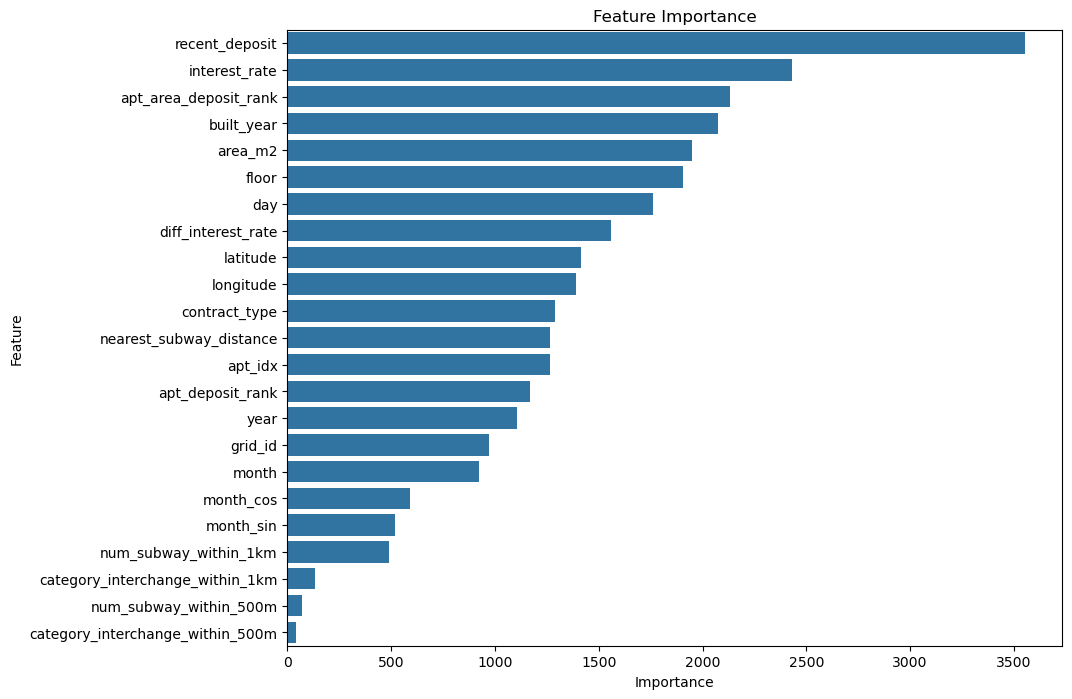

In [14]:
# LightGBM 모델의 피처 중요도 추출
feature_importance = model.feature_importance()

# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [15]:
y_pred

array([21300.97762646,  6884.26902543,  5737.21200267, ...,
       42232.19821089, 34971.05456287, 35021.48540604])

In [16]:
# Create a DataFrame from y_pred with the same index as X_test
y_pred_df = pd.DataFrame(y_pred, index=range(len(y_pred)), columns=['deposit'])

# Display the DataFrame
y_pred_df

,deposit
0,21300.977626
1,6884.269025
2,5737.212003
3,5487.357976
4,5661.552748
...,...
150167,33593.970345
150168,40055.166949
150169,42232.198211
150170,34971.054563


In [17]:
y_pred_df['deposit'].mean()

np.float64(36103.1188884271)

In [19]:
y_pred_df.index.name = 'index'
y_pred_df

,deposit
index,
0,21300.977626
1,6884.269025
2,5737.212003
3,5487.357976
4,5661.552748
...,...
150167,33593.970345
150168,40055.166949
150169,42232.198211


In [20]:
submission_path: str = "../../data/submission"
y_pred_df.to_csv(os.path.join(submission_path, "lightGBM_2.csv"), index=True)